In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Arial'

In [2]:
import FinanceDataReader as fdr

df_krx = fdr.StockListing("KRX")
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,81600,1,300,0.37,81300,81600,80500,11721318,951682170750,487134256080000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,236500,2,-500,-0.21,229500,239000,227500,3760002,878280964000,172172559322500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,328000,2,-3000,-0.91,331500,334000,327500,122584,40437389000,76752000000000,234000000,STK
3,005380,KR7005380001,현대차,KOSPI,,298000,1,8500,2.94,287000,298500,286500,1152775,339710466000,62406024918000,209416191,STK
4,000270,KR7000270009,기아,KOSPI,,131500,1,700,0.54,129100,132300,128200,900473,117569195300,52581381835500,399858417,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,002995,KR7002991008,금호건설우,KOSPI,,10680,2,-410,-3.70,11300,11300,10650,7214,77830330,3121400880,292266,STK
2811,021045,KR7021041009,대호특수강우,KOSDAQ,중견기업부,7260,3,0,0.00,7260,7260,7200,1324,9612160,3080025960,424246,KSQ
2812,236030,KR7236030003,씨알푸드,KONEX,일반기업부,1499,1,125,9.10,1200,1500,1168,769,963439,3047964668,2033332,KNX
2813,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1549,2,-50,-3.13,1699,1699,1500,33,53927,2447358040,1579960,KNX


In [4]:
import FinanceDataReader as fdr

stock = fdr.DataReader('005930')
stock.tail

<bound method NDFrame.tail of              Open   High    Low  Close    Volume    Change
Date                                                      
2000-03-07   5600   5640   5480   5620    601414       NaN
2000-03-08   5520   6000   5500   5920    649288  0.053381
2000-03-09   5970   5980   5620   5620   1117890 -0.050676
2000-03-10   5790   5800   5520   5540    572199 -0.014235
2000-03-13   5480   5490   5160   5180    644358 -0.064982
...           ...    ...    ...    ...       ...       ...
2024-06-21  80700  80800  80000  80000  17907523 -0.019608
2024-06-24  79700  80900  79500  80600  15454227  0.007500
2024-06-25  80600  81800  80100  80800  19088458  0.002481
2024-06-26  80100  81400  79900  81300  17783242  0.006188
2024-06-27  81300  81600  80500  81600  11547360  0.003690

[6000 rows x 6 columns]>

In [5]:
stock.index

DatetimeIndex(['2000-03-07', '2000-03-08', '2000-03-09', '2000-03-10',
               '2000-03-13', '2000-03-14', '2000-03-15', '2000-03-16',
               '2000-03-17', '2000-03-20',
               ...
               '2024-06-14', '2024-06-17', '2024-06-18', '2024-06-19',
               '2024-06-20', '2024-06-21', '2024-06-24', '2024-06-25',
               '2024-06-26', '2024-06-27'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

Text(0, 0.5, 'price')

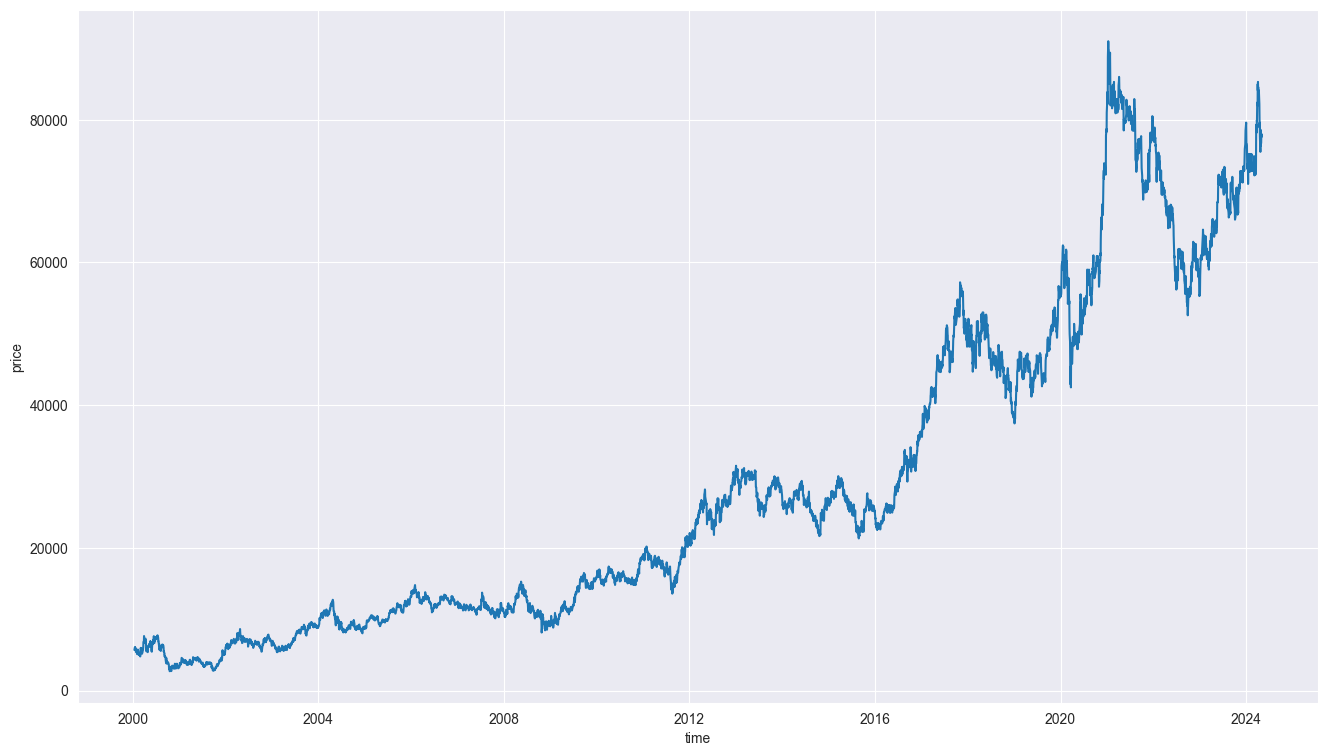

In [21]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

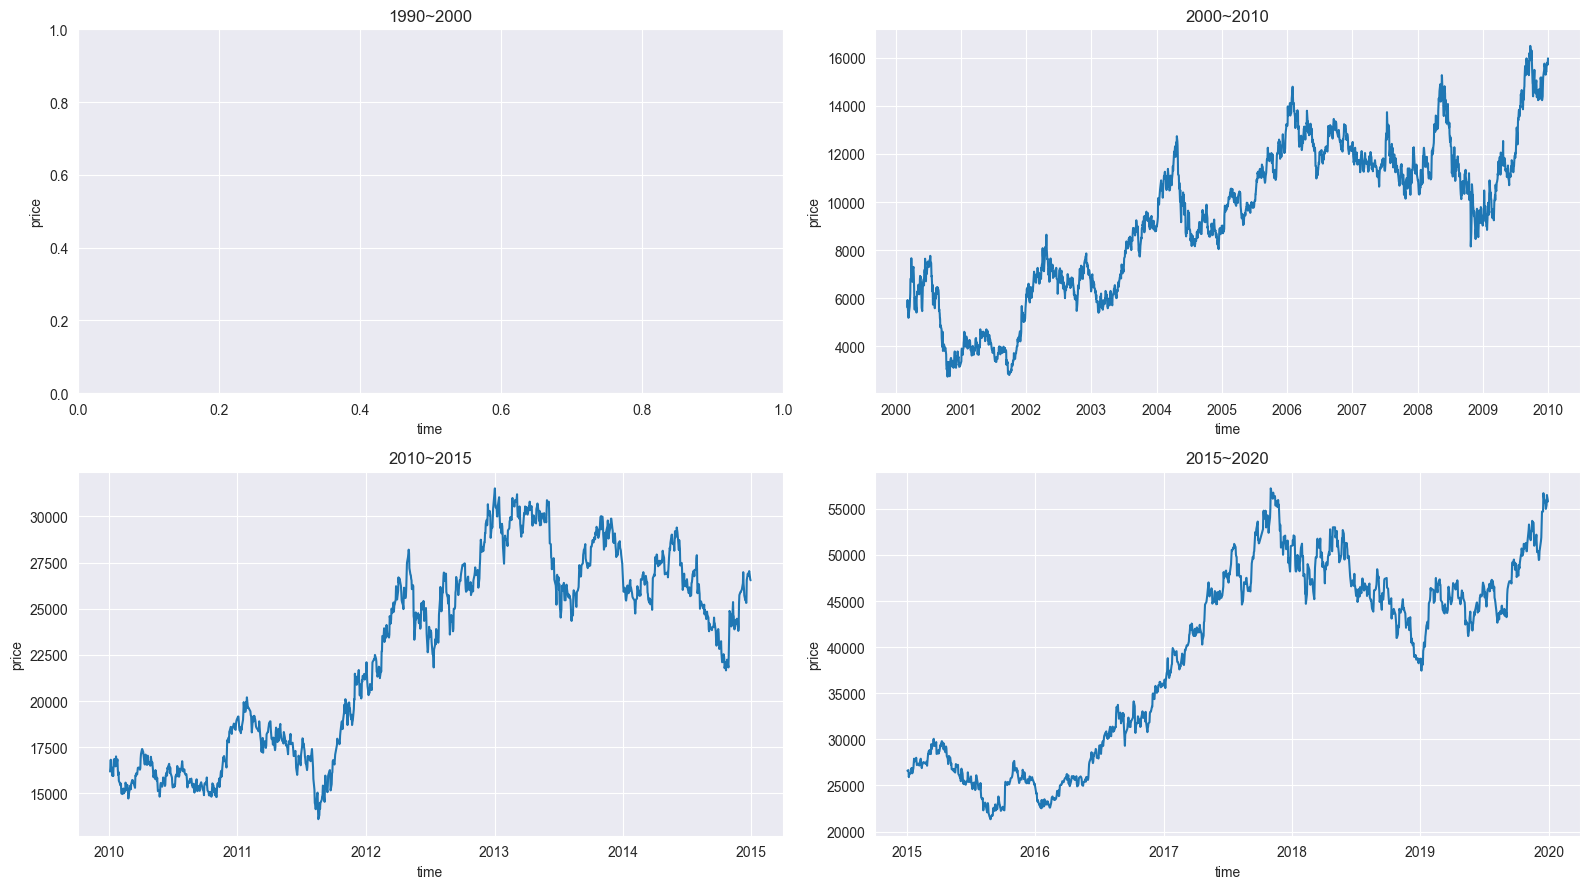

In [6]:
time_steps = [['1990', '2000'],
              ['2000', '2010'],
              ['2010', '2015'],
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.0620155 , 0.05826446, 0.06122905, 0.03274046, 0.00665972],
       [0.06112957, 0.06198347, 0.06145251, 0.03613912, 0.00718985],
       [0.06611296, 0.06177686, 0.0627933 , 0.03274046, 0.01237889],
       ...,
       [0.89258029, 0.84504132, 0.89497207, 0.88444545, 0.21137489],
       [0.88704319, 0.84090909, 0.89273743, 0.89010989, 0.19692166],
       [0.90033223, 0.84297521, 0.89944134, 0.89350855, 0.12786899]])

In [8]:
df = pd.DataFrame(scaled, columns=scale_cols)
df.shape

(6000, 5)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns= ['Close']), df['Close'], test_size=0.2, random_state=0, shuffle=False)

x_train.shape, y_train.shape
#x_test.shape, y_test.shape
#x_train

((4800, 4), (4800,))

In [10]:
import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)



In [11]:
WINDOW_SIZE=20
BATCH_SIZE=32

# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.weights.h5')
checkpoint = ModelCheckpoint(filename,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

history = model.fit(train_data,
                    validation_data=(test_data),
                    epochs=50,
                    callbacks=[checkpoint, earlystopping])


Epoch 1/50
    141/Unknown - 1s 4ms/step - loss: 2.0886e-04 - mse: 4.1772e-04
Epoch 1: val_loss improved from inf to 0.00355, saving model to tmp/ckeckpointer.weights.h5
150/150 [==============================] - 2s 10ms/step - loss: 2.0405e-04 - mse: 4.0810e-04 - val_loss: 0.0035 - val_mse: 0.0071
Epoch 2/50
150/150 [==============================] - ETA: 0s - loss: 5.0906e-05 - mse: 1.0181e-04
Epoch 2: val_loss improved from 0.00355 to 0.00284, saving model to tmp/ckeckpointer.weights.h5
150/150 [==============================] - 1s 4ms/step - loss: 5.0906e-05 - mse: 1.0181e-04 - val_loss: 0.0028 - val_mse: 0.0057
Epoch 3/50
144/150 [===========================>..] - ETA: 0s - loss: 4.7364e-05 - mse: 9.4728e-05
Epoch 3: val_loss improved from 0.00284 to 0.00252, saving model to tmp/ckeckpointer.weights.h5
150/150 [==============================] - 1s 4ms/step - loss: 4.9355e-05 - mse: 9.8710e-05 - val_loss: 0.0025 - val_mse: 0.0050
Epoch 4/50
136/150 [==========================>...] 

In [13]:
model.load_weights(filename)
pred = model.predict(test_data)
pred.shape

37/37 [==============================] - 0s 2ms/step


(1180, 1)

hella


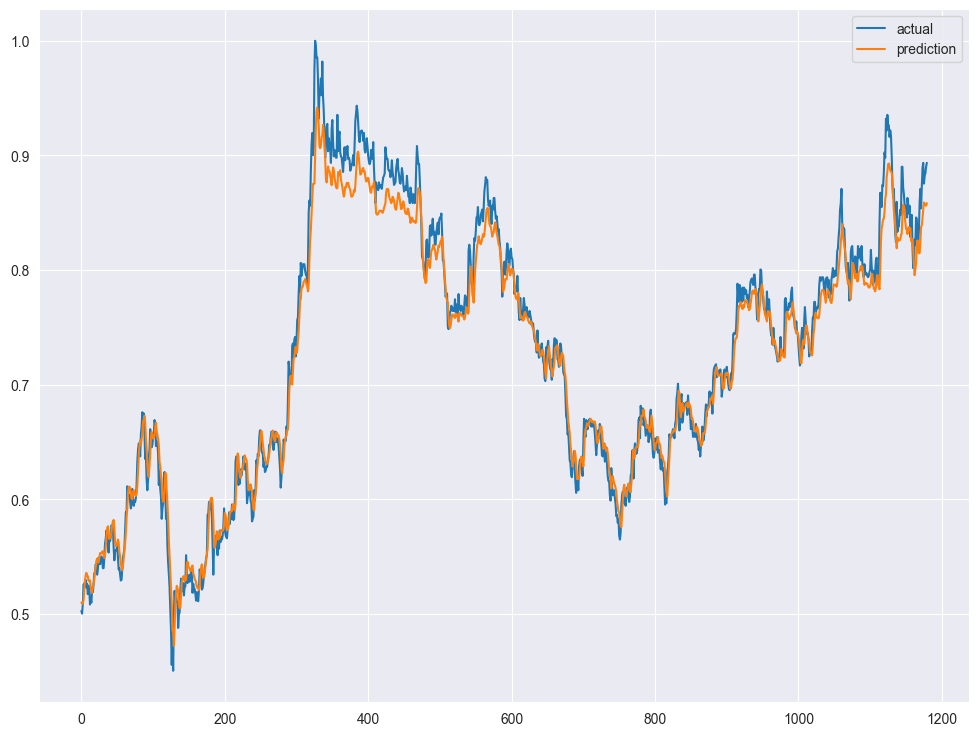

In [14]:
print('hella')
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()
